# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,M,0,0,0,157500.0,254700.0,27558.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False
307507,456252,0,0,F,0,1,0,72000.0,269550.0,12001.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,True
307508,456253,0,0,F,0,1,0,153000.0,677664.0,29979.0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,False
307509,456254,1,0,F,0,1,0,171000.0,370107.0,20205.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [6]:
#新增年齡[age]欄位
app_train['ages']=app_train['DAYS_BIRTH'] // 365
app_train['ages_range']=pd.cut(app_train['ages'],[0,10,20,30,40,50,60,70,80,90,100,110])

In [7]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,ages,ages_range
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,False,25,"(20, 30]"
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,False,45,"(40, 50]"
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,False,52,"(50, 60]"
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,False,52,"(50, 60]"
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,False,54,"(50, 60]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,M,0,0,0,157500.0,254700.0,27558.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,False,25,"(20, 30]"
307507,456252,0,0,F,0,1,0,72000.0,269550.0,12001.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,True,56,"(50, 60]"
307508,456253,0,0,F,0,1,0,153000.0,677664.0,29979.0,...,0,1.0,0.0,0.0,1.0,0.0,1.0,False,41,"(40, 50]"
307509,456254,1,0,F,0,1,0,171000.0,370107.0,20205.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,False,32,"(30, 40]"


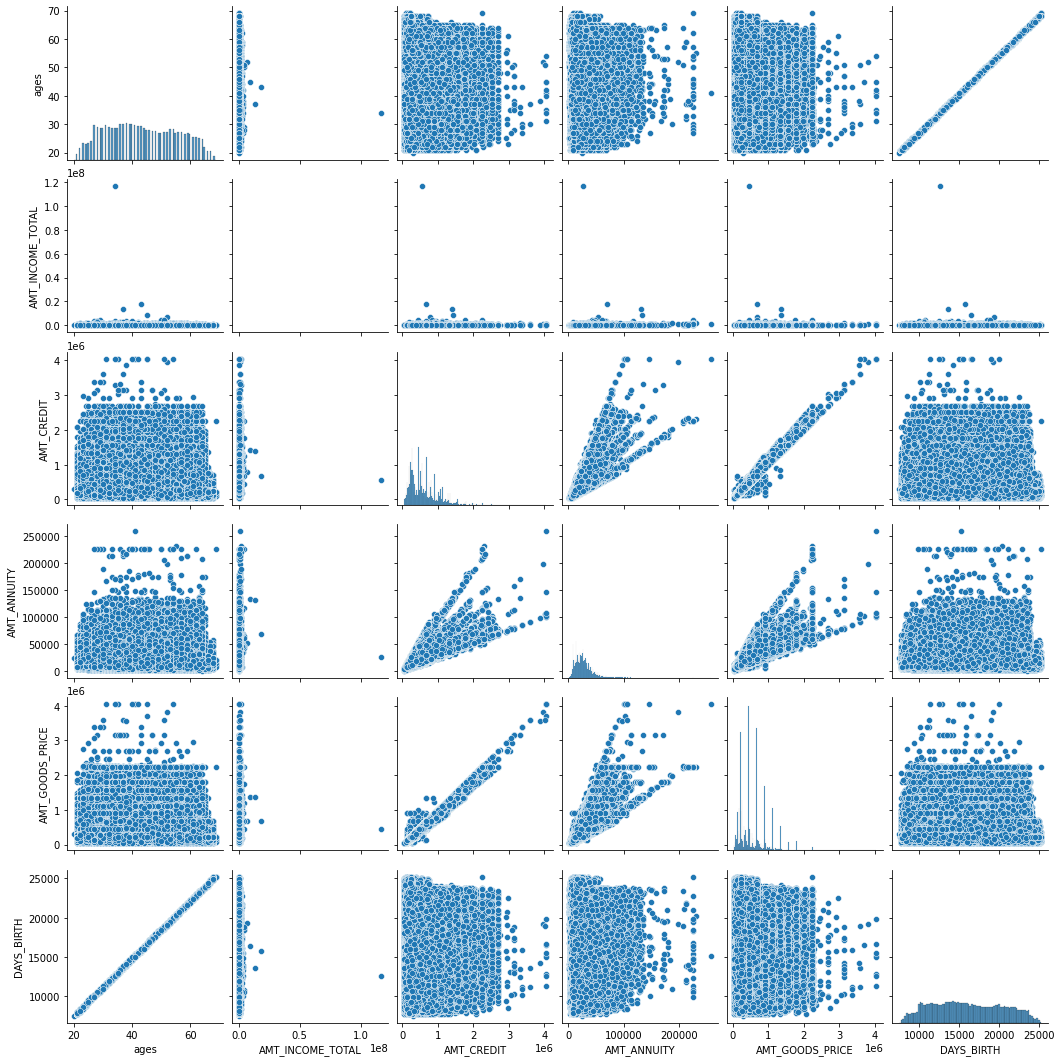

In [15]:
import seaborn as sns
sns.pairplot(app_train[['ages','AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH']])


In [17]:
app_train["ages_range"].value_counts()

(30, 40]      83117
(40, 50]      74401
(50, 60]      67819
(20, 30]      52805
(60, 70]      29368
(10, 20]          1
(0, 10]           0
(70, 80]          0
(80, 90]          0
(90, 100]         0
(100, 110]        0
Name: ages_range, dtype: int64

In [22]:
app_train_group = app_train.groupby('ages').mean()
app_train_group

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
ages,,,,,,,,,,,,,,,,,,,,,
20,372716.000000,0.000000,0.000000,1.000000,1.000000,0.000000,112500.000000,297000.000000,25618.500000,297000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
21,275797.837321,0.113238,0.799841,0.243222,0.721691,0.177033,121359.297847,252728.411483,12427.245215,245528.768489,...,0.000000,0.000000,0.007177,0.000000,0.002597,0.018182,0.075325,0.172727,1.074026,0.003190
22,276620.649847,0.136720,0.292874,0.294238,0.680532,0.184112,141711.539959,415760.690590,21541.533754,373947.107143,...,0.000000,0.000000,0.006137,0.009161,0.008197,0.041466,0.179364,0.246384,1.499518,0.002387
23,277426.002465,0.128667,0.174267,0.330293,0.606359,0.192260,147089.549261,429037.874168,22935.449593,385638.142928,...,0.000000,0.000246,0.004930,0.010760,0.009751,0.031271,0.145595,0.294217,1.524882,0.003451
24,278389.231754,0.110371,0.159027,0.347247,0.593086,0.271447,153958.662830,451774.082074,23450.132812,405741.075789,...,0.000000,0.000768,0.004353,0.009409,0.004032,0.034946,0.175739,0.288642,1.719758,0.002305
25,277213.453935,0.100768,0.144194,0.358685,0.592370,0.325576,158820.581574,464545.851607,24146.991363,420040.357451,...,0.001200,0.001200,0.002879,0.010382,0.010382,0.039084,0.156947,0.275420,1.795115,0.004079
26,275844.477308,0.104363,0.154791,0.379303,0.590221,0.420960,161557.228711,496079.659614,24575.443214,449765.727033,...,0.000439,0.001535,0.001535,0.010586,0.008958,0.027687,0.169653,0.265201,1.776602,0.004824
27,279038.909627,0.118924,0.087069,0.375059,0.604412,0.517343,162751.191732,502078.754306,26020.021062,451136.427373,...,0.000354,0.000944,0.000590,0.006121,0.008399,0.031744,0.214377,0.254662,1.801566,0.002124
28,277637.121505,0.112226,0.095298,0.387085,0.602006,0.582947,166868.852727,517239.775862,26440.543072,465966.020347,...,0.000878,0.001003,0.000251,0.005812,0.005514,0.037258,0.243219,0.257228,1.809389,0.003260


Text(0, 0.5, 'AMT_REQ_CREDIT_BUREAU_YEAR')

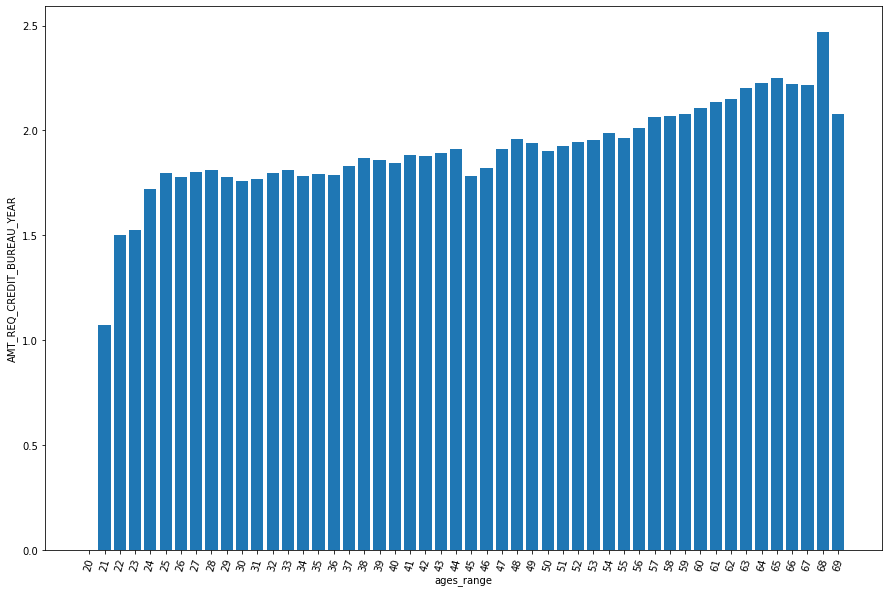

In [42]:
plt.figure(figsize = (15, 10))
plt.bar(range(len(app_train_group.index)), app_train_group['AMT_REQ_CREDIT_BUREAU_YEAR'])

plt.xticks(range(len(app_train_group.index)), app_train_group.index, rotation = 75) 

plt.xlabel('ages_range') 
plt.ylabel('AMT_REQ_CREDIT_BUREAU_YEAR')